 Load the Dataset

In [7]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Explore and Preprocess the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Determine the Optimal Number of Clusters

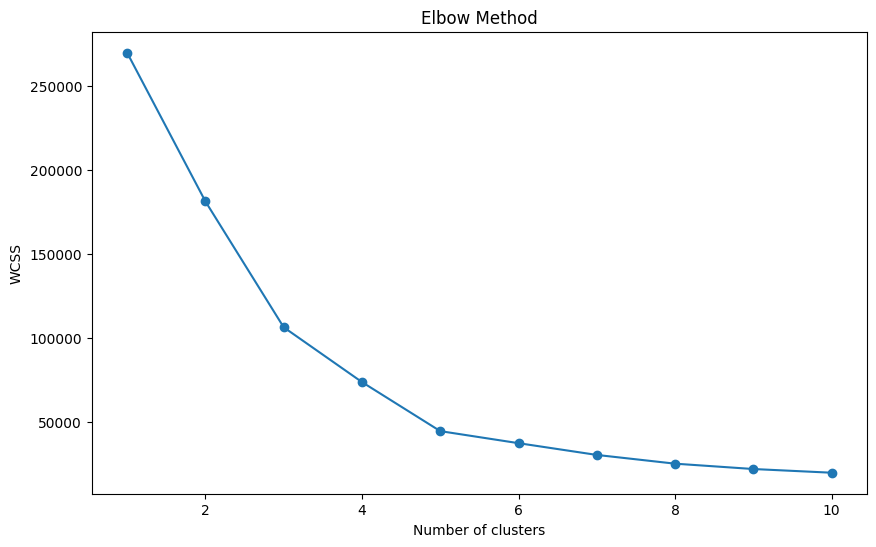

In [9]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Apply the K-means Algorithm

In [10]:
# Applying K-means to the dataset
optimal_clusters = 5  # Based on the elbow method graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans


Visualize the Clusters

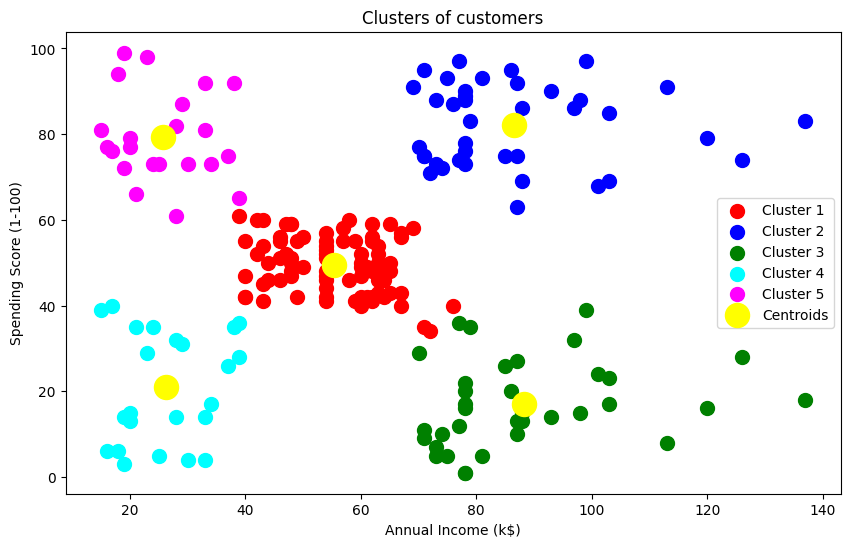

In [11]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(X.iloc[y_kmeans == i, 0], X.iloc[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
